Document Similarity using Vector Databases Tasks:


Collect a dataset of at least 10 text documents of your choice (e.g. news articles, movie reviews, scientific papers).

Choose a vectorization technique such as TF-IDF, Doc2Vec, or BERT to convert each document into a numerical vector representation.

Create a vector database by storing the vectors of all the documents in a data structure such as a matrix or a database table.

Choose a similarity measure to calculate the similarity between two documents.

Implement a document similarity function that takes two documents as input and returns the similarity score using the chosen similarity measure.

Test your document similarity function by comparing pairs of documents and interpreting the results.

Evaluate the performance of your model using at least 
one metric such as precision, recall, F1 score, or Mean Average Precision (MAP).

Write a report summarizing your approach, results, and findings.

**In this python notebook,we will use tfidf method to convert into numerical vector representation,after that we will create vector database or matrix,then compare similarity between docs and evaluate perfomance.**

#**1)Importing libraries**

In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,classification_report, recall_score, precision_score, confusion_matrix, f1_score
pd.set_option("display.max_colwidth", 200)
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier

from sklearn.metrics import accuracy_score,classification_report, recall_score, precision_score, confusion_matrix, f1_score

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
import graphviz

In [2]:
#import gzip

#with open('/content/Imdb_preprocessed.csv', 'rb') as f_in:
    #with gzip.open('/content/Imdb_preprocessed.csv.gz', 'wb') as f_out:
        #f_out.writelines(f_in)


In [4]:
data=pd.read_csv("/content/Imdb_preprocessed (1).csv.gz",encoding='utf-8')

#**2.)Feature Extraction using tfidf matrix**.



#**a)TF-IDF Vectorizer-ngram model**

**We will use a hyperparamter of max_features as 10000 as it is computationally expensive,however most of our unique words should always be considered**

In [5]:
CV = TfidfVectorizer(ngram_range=(1,2),lowercase=True,max_features=10000)
CV_features = CV.fit_transform(data['cleaned_reviews_with_SW2'])
CV_features[0].todense()  # decompressing the CSR data
Tfidfvectorizer_matrix = pd.DataFrame(CV_features.todense(),columns=CV.get_feature_names_out())



##**1)Tfidfvectorizer_matrix dataframe**

In [6]:
Tfidfvectorizer_matrix #term document matrix of top 10000 words,we will build models upon it using this matrix

,aaron,abandon,abandoned,abbey,abbott,abbott costello,abc,ability,able,able make,...,zealand,zellweger,zero,zhang,zoey,zombi,zombie,zombie movie,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.226054,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
49996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
49997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
49998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


**Choose a similarity measure to calculate the similarity between two documents.**

**For checking document similarity between two documents,we will use cosine similarity to check how a particular document is similar to other.**

*Lets write a function which takes matrix,type of similarity we want to measure,and returns a similarity between docs with cosine similarity.Lets check by taking a corpus of reveiws*

In [7]:
corpus=["This movie is an absolute masterpiece. The story, the acting, and the cinematography all come together to create a truly unforgettable experience.",
"I was blown away by this film. The performances were outstanding, and the plot kept me on the edge of my seat the entire time.",
"This is one of the best movies I have ever seen. The characters were so well-developed, and the emotional payoff at the end was incredible.",
"What a fantastic film! The writing was sharp, the direction was flawless, and the performances were top-notch.",
"I can't recommend this movie enough. It had everything: action, drama, humor, and heart. I was thoroughly entertained from start to finish.",
"This movie is a true work of art. The visuals are stunning, the story is gripping, and the performances are outstanding.",
"I was moved to tears by this film. It's rare to find a movie that can be both heartwarming and heartbreaking, but this one pulled it off with aplomb.",
"I was thoroughly impressed by this movie. The pacing was perfect, the characters were fully-realized, and the ending left me feeling satisfied.",
"This is a movie that will stick with me for a long time. The themes were powerful, the performances were outstanding, and the direction was masterful.",
"If you only see one movie this year, make it this one. It's a tour-de-force of filmmaking, and a must see for any fan of cinema.,",
"I can't believe how bad this film was. The characters were one-dimensional, the dialogue was cringe-worthy, and the story made no sense.",
"I was really disappointed by this movie. The trailers made it look so promising, but the final product was a mess.",
"Save your money and skip this one. The writing was terrible, the pacing was off, and the whole thing felt like a cheap knockoff of better films.",
"This movie was a chore to sit through. The performances were lackluster, the direction was pedestrian, and the story was dull.",
"I was really hoping to like this film, but it just didn't deliver. The script was weak, the characters were forgettable, and the whole thing felt like a missed opportunity.",
"This movie had no redeeming qualities. The acting was terrible, the story was nonsensical, and the special effects were laughable.",
"I regret spending money on this movie. It was poorly made, poorly acted, and just plain boring.",
"I couldn't wait for this movie to be over. The pacing was slow, the dialogue was stilted, and the whole thing was just plain dull.",
"This movie was a complete mess. The story was convoluted, the acting was wooden, and the direction was unfocused."]

##**2)Cosinesimilarity of pair fo docs in a given corpus**

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

tfidf = CV.fit_transform(corpus)

# Calculate cosine similarity matrix
cosine_sim = cosine_similarity(tfidf)

# Create a DataFrame to display the results
doc_names = ['Doc {}'.format(i) for i in range(len(corpus))]
similarity_df_tdidf = pd.DataFrame(cosine_sim, index=doc_names, columns=doc_names)
similarity_df_tdidf

,Doc 0,Doc 1,Doc 2,Doc 3,Doc 4,Doc 5,Doc 6,Doc 7,Doc 8,Doc 9,Doc 10,Doc 11,Doc 12,Doc 13,Doc 14,Doc 15,Doc 16,Doc 17,Doc 18
Doc 0,1.000000,0.060160,0.071348,0.055416,0.030904,0.144659,0.033656,0.064429,0.069777,0.012118,0.073615,0.044496,0.049035,0.112585,0.053914,0.137101,0.020918,0.072966,0.150242
Doc 1,0.060160,1.000000,0.091123,0.178782,0.009706,0.119309,0.062928,0.128814,0.222211,0.029180,0.103411,0.079567,0.077254,0.137959,0.090513,0.081791,0.036081,0.069383,0.089095
Doc 2,0.071348,0.091123,1.000000,0.080443,0.009129,0.098876,0.021187,0.118193,0.108113,0.047907,0.126456,0.066584,0.084238,0.084470,0.099785,0.076928,0.010111,0.065258,0.083797
Doc 3,0.055416,0.178782,0.080443,1.000000,0.012854,0.088741,0.025385,0.085748,0.189281,0.003066,0.099108,0.052178,0.150403,0.231042,0.086746,0.090619,0.014236,0.080829,0.178836
Doc 4,0.030904,0.009706,0.009129,0.012854,1.000000,0.018919,0.073906,0.076484,0.014984,0.031500,0.033143,0.037687,0.015821,0.048168,0.032954,0.054829,0.038062,0.041335,0.040768
Doc 5,0.144659,0.119309,0.098876,0.088741,0.018919,1.000000,0.012820,0.064538,0.132344,0.035009,0.073740,0.044572,0.062058,0.130886,0.043468,0.094584,0.020953,0.061245,0.103649
Doc 6,0.033656,0.062928,0.021187,0.025385,0.073906,0.012820,1.000000,0.048965,0.076274,0.082052,0.069287,0.087958,0.062017,0.049551,0.086309,0.021128,0.040517,0.062784,0.031116
Doc 7,0.064429,0.128814,0.118193,0.085748,0.076484,0.064538,0.048965,1.000000,0.098982,0.012420,0.125145,0.124958,0.120668,0.109911,0.109536,0.096355,0.030213,0.144968,0.114527
Doc 8,0.069777,0.222211,0.108113,0.189281,0.014984,0.132344,0.076274,0.098982,1.000000,0.027271,0.071481,0.043598,0.054524,0.195434,0.062566,0.083911,0.016595,0.081973,0.138754
Doc 9,0.012118,0.029180,0.047907,0.003066,0.031500,0.035009,0.082052,0.012420,0.027271,1.000000,0.030275,0.031097,0.066230,0.013734,0.023832,0.013125,0.034886,0.027350,0.014383


In [9]:
# Get most similar document for each document
most_similar = {}
for i, doc in enumerate(corpus):
    sim_scores = list(cosine_sim[i])
    sim_scores[i] = 0  # Set similarity score to 0 for the document itself
    most_similar_idx = sim_scores.index(max(sim_scores))
    most_similar[doc_names[i]] = doc_names[most_similar_idx]

# Display most similar document for each document
for doc, most_similar_doc in most_similar.items():
    print(f"{doc} is most similar to {most_similar_doc}")


Doc 0 is most similar to Doc 18
Doc 1 is most similar to Doc 8
Doc 2 is most similar to Doc 10
Doc 3 is most similar to Doc 13
Doc 4 is most similar to Doc 7
Doc 5 is most similar to Doc 0
Doc 6 is most similar to Doc 11
Doc 7 is most similar to Doc 17
Doc 8 is most similar to Doc 1
Doc 9 is most similar to Doc 6
Doc 10 is most similar to Doc 17
Doc 11 is most similar to Doc 7
Doc 12 is most similar to Doc 14
Doc 13 is most similar to Doc 18
Doc 14 is most similar to Doc 12
Doc 15 is most similar to Doc 18
Doc 16 is most similar to Doc 17
Doc 17 is most similar to Doc 12
Doc 18 is most similar to Doc 13


##**3.a)Defining error metrics**

In [10]:
# Function for Classification Report

def classifcation_report_train_test(y_train, y_train_pred, y_test, y_test_pred):

    print('''
            *****************************************
               CLASSIFICATION REPORT FOR TRAIN DATA
            *****************************************
            ''')
    print(classification_report(y_train, y_train_pred, digits=4))

    print('''
            *****************************************
               CLASSIFICATION REPORT FOR TEST DATA
            *****************************************
            ''')
    print(classification_report(y_test, y_test_pred, digits=4))

In [11]:
#defining error metrics
scores = pd.DataFrame(columns=['Model','Train_Accuracy','Train_Recall','Test_Accuracy','Test_Recall'])

def get_metrics(train_actual,train_predicted,test_actual,test_predicted,model_description,dataframe):
    train_accuracy = accuracy_score(train_actual,train_predicted)
    train_recall   = recall_score(train_actual,train_predicted,average="macro")
    test_accuracy = accuracy_score(test_actual,test_predicted)
    test_recall   = recall_score(test_actual,test_predicted,average="macro")
    dataframe = dataframe.append(pd.Series([model_description, train_accuracy,train_recall,
                                            test_accuracy,test_recall],
                                           index=scores.columns ), ignore_index=True)
    return(dataframe)

##**4)Model building**

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(CV_features, data['sentiment'], test_size=0.2, stratify=data['sentiment'], random_state=42)
print('X_Train Size:', (X_train.shape))
print('X _test Size:', (X_test.shape))
print('Y_train Size:', (y_train.shape))
print('Y_test Size:', (y_test.shape))

X_Train Size: (40000, 10000)
X _test Size: (10000, 10000)
Y_train Size: (40000,)
Y_test Size: (10000,)


###a)Logistic regression

In [13]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(solver='liblinear')
LR.fit(X_train, y_train)
y_pred_train =LR.predict(X_train)
y_pred_train[0:10]
# Make predictions on the testing set and evaluate accuracy
y_pred_test = LR.predict(X_test)
y_pred_test[0:10]
print("trainaccuracy",accuracy_score(y_train,y_pred_train))
print("testaccuracy",accuracy_score(y_test,y_pred_test))

classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"LogisticRegression",scores)
scores


trainaccuracy 0.9159
testaccuracy 0.883

            *****************************************
               CLASSIFICATION REPORT FOR TRAIN DATA
            *****************************************
            
              precision    recall  f1-score   support

    negative     0.9239    0.9065    0.9151     20000
    positive     0.9082    0.9253    0.9167     20000

    accuracy                         0.9159     40000
   macro avg     0.9160    0.9159    0.9159     40000
weighted avg     0.9160    0.9159    0.9159     40000


            *****************************************
               CLASSIFICATION REPORT FOR TEST DATA
            *****************************************
            
              precision    recall  f1-score   support

    negative     0.8934    0.8698    0.8814      5000
    positive     0.8731    0.8962    0.8845      5000

    accuracy                         0.8830     10000
   macro avg     0.8833    0.8830    0.8830     10000
weighted avg  

<ipython-input-11-912877590d65>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(pd.Series([model_description, train_accuracy,train_recall,


,Model,Train_Accuracy,Train_Recall,Test_Accuracy,Test_Recall
0,LogisticRegression,0.9159,0.9159,0.883,0.883


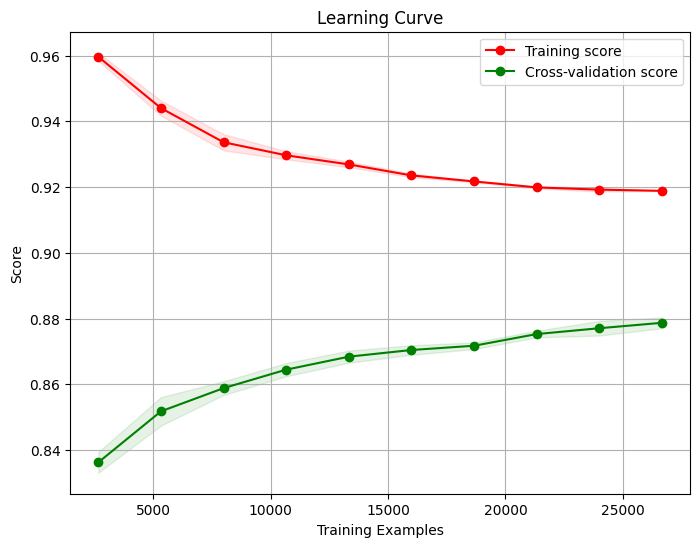

In [14]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(LR, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8,6))
plt.grid()
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()

**This is generalizing well but still there is a gap between them,it should be taken care by adding a regularization term,or more training examples might be helpful.**

###b)Logistic regression-reguralization

In [15]:
## L1-REGULARIZATION
LR1 = LogisticRegression(class_weight='balanced', solver='liblinear', penalty='l1', C=0.4)
LR1.fit(X_train, y_train)
y_pred_train =LR1.predict(X_train)
y_pred_train[0:10]
# Make predictions on the testing set and evaluate accuracy
y_pred_test = LR1.predict(X_test)
y_pred_test[0:10]
print("trainaccuracy",accuracy_score(y_train,y_pred_train))
print("testaccuracy",accuracy_score(y_test,y_pred_test))

classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"LogisticRegression-l1",scores)
scores


trainaccuracy 0.867675
testaccuracy 0.8559

            *****************************************
               CLASSIFICATION REPORT FOR TRAIN DATA
            *****************************************
            
              precision    recall  f1-score   support

    negative     0.8839    0.8465    0.8648     20000
    positive     0.8527    0.8889    0.8704     20000

    accuracy                         0.8677     40000
   macro avg     0.8683    0.8677    0.8676     40000
weighted avg     0.8683    0.8677    0.8676     40000


            *****************************************
               CLASSIFICATION REPORT FOR TEST DATA
            *****************************************
            
              precision    recall  f1-score   support

    negative     0.8708    0.8358    0.8529      5000
    positive     0.8421    0.8760    0.8587      5000

    accuracy                         0.8559     10000
   macro avg     0.8565    0.8559    0.8558     10000
weighted av

<ipython-input-11-912877590d65>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(pd.Series([model_description, train_accuracy,train_recall,


,Model,Train_Accuracy,Train_Recall,Test_Accuracy,Test_Recall
0,LogisticRegression,0.915900,0.915900,0.8830,0.8830
1,LogisticRegression-l1,0.867675,0.867675,0.8559,0.8559


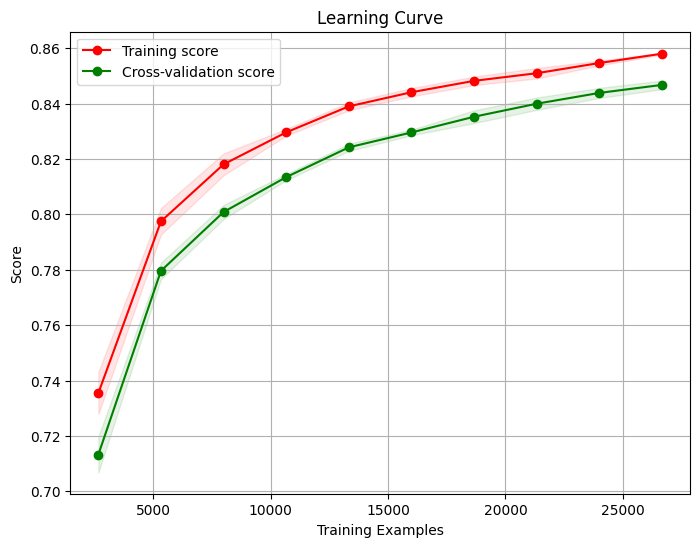

In [16]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(LR1, X_train, y_train, cv=3, scoring='accuracy', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10))

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(8,6))
plt.grid()
plt.title("Learning Curve")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
plt.legend(loc="best")
plt.show()

**It is neither overfitting nor underfiiting it is a genralized model which can be used.**

###**c)DecisionTreeClassifier**

In [17]:
##DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT.fit(X_train, y_train)
y_pred_train =DT.predict(X_train)
y_pred_train[0:10]
# Make predictions on the testing set and evaluate accuracy
y_pred_test = DT.predict(X_test)
y_pred_test[0:10]
print("trainaccuracy",accuracy_score(y_train,y_pred_train))
print("testaccuracy",accuracy_score(y_test,y_pred_test))

classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"Decision tree",scores)
scores

trainaccuracy 1.0
testaccuracy 0.7144

            *****************************************
               CLASSIFICATION REPORT FOR TRAIN DATA
            *****************************************
            
              precision    recall  f1-score   support

    negative     1.0000    1.0000    1.0000     20000
    positive     1.0000    1.0000    1.0000     20000

    accuracy                         1.0000     40000
   macro avg     1.0000    1.0000    1.0000     40000
weighted avg     1.0000    1.0000    1.0000     40000


            *****************************************
               CLASSIFICATION REPORT FOR TEST DATA
            *****************************************
            
              precision    recall  f1-score   support

    negative     0.7143    0.7146    0.7145      5000
    positive     0.7145    0.7142    0.7143      5000

    accuracy                         0.7144     10000
   macro avg     0.7144    0.7144    0.7144     10000
weighted avg    

<ipython-input-11-912877590d65>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(pd.Series([model_description, train_accuracy,train_recall,


,Model,Train_Accuracy,Train_Recall,Test_Accuracy,Test_Recall
0,LogisticRegression,0.915900,0.915900,0.8830,0.8830
1,LogisticRegression-l1,0.867675,0.867675,0.8559,0.8559
2,Decision tree,1.000000,1.000000,0.7144,0.7144


**Without even plotting we can understand here that it is clearly overfitting case,we will do hyperparamter tuning so we might get a better accuracy.**

###d)Randomforest

In [18]:
# Import Randomforest Library

from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier()
clf_rf.fit(X=X_train, y= y_train)

y_pred_train = clf_rf.predict(X_train)
y_pred_test = clf_rf.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train,y_pred_train))
# print("Train Classification Report:")
# print(classification_report(y_train,y_pred_train,digits=4))

print("Test Accuracy:",accuracy_score(y_test,y_pred_test))
# print("Test Classification Report:")
#print(classification_report(y_test,y_pred_test,digits=4))
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"randomforest",scores)

Train Accuracy: 1.0
Test Accuracy: 0.843

            *****************************************
               CLASSIFICATION REPORT FOR TRAIN DATA
            *****************************************
            
              precision    recall  f1-score   support

    negative     1.0000    1.0000    1.0000     20000
    positive     1.0000    1.0000    1.0000     20000

    accuracy                         1.0000     40000
   macro avg     1.0000    1.0000    1.0000     40000
weighted avg     1.0000    1.0000    1.0000     40000


            *****************************************
               CLASSIFICATION REPORT FOR TEST DATA
            *****************************************
            
              precision    recall  f1-score   support

    negative     0.8351    0.8548    0.8448      5000
    positive     0.8513    0.8312    0.8411      5000

    accuracy                         0.8430     10000
   macro avg     0.8432    0.8430    0.8430     10000
weighted avg 

<ipython-input-11-912877590d65>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(pd.Series([model_description, train_accuracy,train_recall,


**It is clearly overfitting.**

**Label Encoding**

In [19]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
data['sentiment']= label_encoder.fit_transform(data['sentiment']) 

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(CV_features, data['sentiment'], test_size=0.2, stratify=data['sentiment'], random_state=42)
print('X_Train Size:', (X_train.shape))
print('X _test Size:', (X_test.shape))
print('Y_train Size:', (y_train.shape))
print('Y_test Size:', (y_test.shape))

X_Train Size: (40000, 10000)
X _test Size: (10000, 10000)
Y_train Size: (40000,)
Y_test Size: (10000,)


###e)XGBClassifier

In [21]:
# Import XGBClassifier Library

from xgboost import XGBClassifier
clf_XGB = XGBClassifier()
clf_XGB.fit(X=X_train, y= y_train)

y_pred_train = clf_XGB.predict(X_train)
y_pred_test = clf_XGB.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train,y_pred_train))
# print("Train Classification Report:")
# print(classification_report(y_train,y_pred_train,digits=4))

print("Test Accuracy:",accuracy_score(y_test,y_pred_test))
# print("Test Classification Report:")
#print(classification_report(y_test,y_pred_test,digits=4))
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"XGBOOST",scores)
scores

Train Accuracy: 0.911925
Test Accuracy: 0.8442

            *****************************************
               CLASSIFICATION REPORT FOR TRAIN DATA
            *****************************************
            
              precision    recall  f1-score   support

           0     0.9358    0.8845    0.9094     20000
           1     0.8905    0.9393    0.9143     20000

    accuracy                         0.9119     40000
   macro avg     0.9132    0.9119    0.9119     40000
weighted avg     0.9132    0.9119    0.9119     40000


            *****************************************
               CLASSIFICATION REPORT FOR TEST DATA
            *****************************************
            
              precision    recall  f1-score   support

           0     0.8631    0.8182    0.8400      5000
           1     0.8272    0.8702    0.8481      5000

    accuracy                         0.8442     10000
   macro avg     0.8451    0.8442    0.8441     10000
weighte

<ipython-input-11-912877590d65>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(pd.Series([model_description, train_accuracy,train_recall,


,Model,Train_Accuracy,Train_Recall,Test_Accuracy,Test_Recall
0,LogisticRegression,0.915900,0.915900,0.8830,0.8830
1,LogisticRegression-l1,0.867675,0.867675,0.8559,0.8559
2,Decision tree,1.000000,1.000000,0.7144,0.7144
3,randomforest,1.000000,1.000000,0.8430,0.8430
4,XGBOOST,0.911925,0.911925,0.8442,0.8442


**It is clearly overfitting.**

In [22]:
scores

,Model,Train_Accuracy,Train_Recall,Test_Accuracy,Test_Recall
0,LogisticRegression,0.915900,0.915900,0.8830,0.8830
1,LogisticRegression-l1,0.867675,0.867675,0.8559,0.8559
2,Decision tree,1.000000,1.000000,0.7144,0.7144
3,randomforest,1.000000,1.000000,0.8430,0.8430
4,XGBOOST,0.911925,0.911925,0.8442,0.8442


###f)Gradient boosting algorithm

In [23]:
clf_GBM = GradientBoostingClassifier()
clf_GBM.fit(X=X_train, y=y_train)

y_pred_train = clf_GBM.predict(X_train)
y_pred_test = clf_GBM.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train,y_pred_train))
# print("Train Classification Report:")
# print(classification_report(y_train,y_pred_train,digits=4))

print("Test Accuracy:",accuracy_score(y_test,y_pred_test))
# print("Test Classification Report:")
#print(classification_report(y_test,y_pred_test,digits=4))
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)
scores = get_metrics(y_train,y_pred_train,y_test,y_pred_test,"GBM",scores)

Train Accuracy: 0.808025
Test Accuracy: 0.7933

            *****************************************
               CLASSIFICATION REPORT FOR TRAIN DATA
            *****************************************
            
              precision    recall  f1-score   support

           0     0.8667    0.7280    0.7913     20000
           1     0.7655    0.8881    0.8222     20000

    accuracy                         0.8080     40000
   macro avg     0.8161    0.8080    0.8068     40000
weighted avg     0.8161    0.8080    0.8068     40000


            *****************************************
               CLASSIFICATION REPORT FOR TEST DATA
            *****************************************
            
              precision    recall  f1-score   support

           0     0.8488    0.7138    0.7754      5000
           1     0.7531    0.8728    0.8085      5000

    accuracy                         0.7933     10000
   macro avg     0.8009    0.7933    0.7920     10000
weighte

<ipython-input-11-912877590d65>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(pd.Series([model_description, train_accuracy,train_recall,


**GBM model clearly is underfitting,it is not generalizing data well**

In [24]:
scores

,Model,Train_Accuracy,Train_Recall,Test_Accuracy,Test_Recall
0,LogisticRegression,0.915900,0.915900,0.8830,0.8830
1,LogisticRegression-l1,0.867675,0.867675,0.8559,0.8559
2,Decision tree,1.000000,1.000000,0.7144,0.7144
3,randomforest,1.000000,1.000000,0.8430,0.8430
4,XGBOOST,0.911925,0.911925,0.8442,0.8442
5,GBM,0.808025,0.808025,0.7933,0.7933


Out of all logistic regression has perfomed far better and we got better results when we add a regularization to it.The table shows the results of training and testing various classification models for binary sentiment analysis. The Logistic Regression model achieved the highest accuracy and recall on both training and testing sets, while the Decision Tree model overfit the training set with perfect accuracy and recall, but performed poorly on the testing set. The Random Forest, XGBoost, and GBM models all performed moderately well on the testing set with accuracy and recall scores ranging from 0.7933 to 0.8418. Overall, the Logistic Regression model with L2 regularization performed the best on this dataset.

#**5)Hyper-paramter tuning to get better results and reduce overfitting to get a best model.**

##**a)Validation and paramter tuning**

In [25]:
scores1 = pd.DataFrame(columns=['Model','Train_Accuracy','Train_Recall','Train_Precision','Train_F1_Score','Test_Accuracy','Test_Recall','Test_Precision','Test_F1_Score'])

def get_metrics(train_actual,train_predicted,test_actual,test_predicted,model_description,dataframe):
   
    train_accuracy = accuracy_score(train_actual,train_predicted)
    train_recall   = recall_score(train_actual,train_predicted,average="macro")
    train_precision= precision_score(train_actual,train_predicted,average="macro")
    train_f1score  = f1_score(train_actual,train_predicted,average="macro")
    test_accuracy = accuracy_score(test_actual,test_predicted)
    test_recall   = recall_score(test_actual,test_predicted,average="macro")
    test_precision= precision_score(test_actual,test_predicted,average="macro")
    test_f1score  = f1_score(test_actual,test_predicted,average="macro")
    dataframe = dataframe.append(pd.Series([model_description, train_accuracy,train_recall,train_precision,train_f1score,
                                            test_accuracy,test_recall,test_precision,test_f1score],
                                           index=scores1.columns ), ignore_index=True)
    return(dataframe)

In [26]:
# Define the stratified k-fold cross-validator
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
from sklearn.model_selection import RandomizedSearchCV

Lets start randomized search cv with our overfit models first

After running randomized search cv and getting results from it we are going to store it as a text to ensure lesser run time



```
# Decision Tree with RandomizedSearchCV - Hyper-parameter Tuning
# set of parameters to test
param_grid = {"class_weight":['balanced', None],
              "criterion": ["gini", "entropy"],
              "max_depth": [3, 5, 6],
              "min_samples_leaf": [2, 5, 10],
               "max_leaf_nodes": [None, 5, 10, 20]
              }
dt = DecisionTreeClassifier(random_state=123)
clf_dt_grid = RandomizedSearchCV(dt, param_grid,cv=skf,scoring='recall')
clf_dt_grid.fit(X_train, y_train)  
print(clf_dt_grid.best_params_) 
```



###**1)Decision tree with hyperparamters**

In [27]:
#output:-{'min_samples_leaf': 5, 'max_leaf_nodes': 20, 'max_depth': 6, 'criterion': 'gini', 'class_weight': 'balanced'}

In [28]:
clf_dt_grid = DecisionTreeClassifier(min_samples_leaf=10, max_leaf_nodes=30, max_depth=8, criterion='entropy', class_weight='balanced')
clf_dt_grid.fit(X=X_train, y= y_train)

y_pred_train = clf_dt_grid.predict(X_train)
y_pred_test = clf_dt_grid.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train,y_pred_train))
# print("Train Classification Report:")
# print(classification_report(y_train,y_pred_train,digits=4))

print("Test Accuracy:",accuracy_score(y_test,y_pred_test))
# print("Test Classification Report:")
#print(classification_report(y_test,y_pred_test,digits=4))
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)

Train Accuracy: 0.6846
Test Accuracy: 0.685

            *****************************************
               CLASSIFICATION REPORT FOR TRAIN DATA
            *****************************************
            
              precision    recall  f1-score   support

           0     0.8584    0.4421    0.5837     20000
           1     0.6243    0.9271    0.7461     20000

    accuracy                         0.6846     40000
   macro avg     0.7413    0.6846    0.6649     40000
weighted avg     0.7413    0.6846    0.6649     40000


            *****************************************
               CLASSIFICATION REPORT FOR TEST DATA
            *****************************************
            
              precision    recall  f1-score   support

           0     0.8539    0.4464    0.5863      5000
           1     0.6252    0.9236    0.7457      5000

    accuracy                         0.6850     10000
   macro avg     0.7396    0.6850    0.6660     10000
weighted a

In [29]:
scores1= get_metrics(y_train,y_pred_train,y_test,y_pred_test,"DecisionTree_BestParameters",scores1)
scores1

<ipython-input-25-132420240bc7>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(pd.Series([model_description, train_accuracy,train_recall,train_precision,train_f1score,


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,DecisionTree_BestParameters,0.6846,0.6846,0.741348,0.664902,0.685,0.685,0.73955,0.665985


###**2)Decisiontree with randomized search cv using different paramters.**


```
#from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, truncnorm, randint

clf3_dt = DecisionTreeClassifier(random_state=123, class_weight='balanced') 
max_leaf_nodes = np.random.normal(loc=5, scale=1, size=5).astype(int)
max_leaf_nodes[max_leaf_nodes <1] = 1
print(max_leaf_nodes)
max_depth = np.random.uniform(2,5,4).astype(int)
print(max_depth)
min_samples_split = np.random.uniform(2, 6, 5).astype(int)
print(min_samples_split)
## Set Up Hyperparameter Distributions
# normally distributed max_leaf_nodes, with mean 5 stddev 1
max_leaf_nodes = np.random.normal(loc=5, scale=1, size=5).astype(int)

# uniform distribution from 2 to 5 
max_depth = np.random.uniform(2,5,4).astype(int)

# uniform distribution from 2 to 6
min_samples_split = np.random.uniform(2, 6, 5).astype(int)

model_params = {
    'max_depth': list(max_depth),
    'max_leaf_nodes': list(max_leaf_nodes),
    'min_samples_split': list(min_samples_split)
}
clf_random = RandomizedSearchCV(estimator=clf3_dt, param_distributions=model_params, n_iter=600, cv=skf, scoring='recall', n_jobs=-1)
clf_random.fit(X_train, y_train)
print(clf_random.best_score_, clf_random.best_params_)
clf_dt_random = clf_random.best_estimator_
print(clf_dt_random)
```



In [30]:
clf_dt_grid2 = DecisionTreeClassifier(class_weight='balanced', max_depth=3, max_leaf_nodes=5,
                       min_samples_split=3, random_state=123)
clf_dt_grid2.fit(X=X_train, y= y_train)

y_pred_train = clf_dt_grid2.predict(X_train)
y_pred_test = clf_dt_grid2.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train,y_pred_train))
# print("Train Classification Report:")
# print(classification_report(y_train,y_pred_train,digits=4))

print("Test Accuracy:",accuracy_score(y_test,y_pred_test))
# print("Test Classification Report:")
#print(classification_report(y_test,y_pred_test,digits=4))
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)

Train Accuracy: 0.633625
Test Accuracy: 0.6366

            *****************************************
               CLASSIFICATION REPORT FOR TRAIN DATA
            *****************************************
            
              precision    recall  f1-score   support

           0     0.9052    0.2985    0.4490     20000
           1     0.5800    0.9688    0.7256     20000

    accuracy                         0.6336     40000
   macro avg     0.7426    0.6336    0.5873     40000
weighted avg     0.7426    0.6336    0.5873     40000


            *****************************************
               CLASSIFICATION REPORT FOR TEST DATA
            *****************************************
            
              precision    recall  f1-score   support

           0     0.9046    0.3054    0.4566      5000
           1     0.5822    0.9678    0.7270      5000

    accuracy                         0.6366     10000
   macro avg     0.7434    0.6366    0.5918     10000
weighte

In [31]:
scores1= get_metrics(y_train,y_pred_train,y_test,y_pred_test,"DecisionTree_BestParameters-2",scores1)
scores1

<ipython-input-25-132420240bc7>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(pd.Series([model_description, train_accuracy,train_recall,train_precision,train_f1score,


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,DecisionTree_BestParameters,0.684600,0.684600,0.741348,0.664902,0.6850,0.6850,0.739550,0.665985
1,DecisionTree_BestParameters-2,0.633625,0.633625,0.742617,0.587272,0.6366,0.6366,0.743396,0.591826


###**3)Random forest with hyperparamter tuning**



```
# param_grid = {#"n_estimators" : [50,60],
              "criterion": ["gini", "entropy"],
              "min_samples_split": [2, 5],
              "max_depth": [None, 7],
              "min_samples_leaf": [1, 5],
              "ccp_alpha":[0.0001,0.001,0.01,0.1]
             }
rfclf2 = RandomForestClassifier()
rfclf_grid = RandomizedSearchCV(rfclf2, param_grid, cv=skf)     
rfclf_grid.fit(X_train, y_train)
print(rfclf_grid.best_params_)
rfclf_grid = rfclf_grid.best_estimator_ 
print(rfclf_grid)
```



In [32]:
rfclf_grid =RandomForestClassifier(ccp_alpha=0.0001, min_samples_split=5)

rfclf_grid.fit(X=X_train, y= y_train)

y_pred_train = rfclf_grid.predict(X_train)
y_pred_test = rfclf_grid.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train,y_pred_train))
# print("Train Classification Report:")
# print(classification_report(y_train,y_pred_train,digits=4))

print("Test Accuracy:",accuracy_score(y_test,y_pred_test))
# print("Test Classification Report:")
#print(classification_report(y_test,y_pred_test,digits=4))
classifcation_report_train_test(y_train,y_pred_train,y_test,y_pred_test)

Train Accuracy: 0.947375
Test Accuracy: 0.8396

            *****************************************
               CLASSIFICATION REPORT FOR TRAIN DATA
            *****************************************
            
              precision    recall  f1-score   support

           0     0.9531    0.9411    0.9470     20000
           1     0.9418    0.9536    0.9477     20000

    accuracy                         0.9474     40000
   macro avg     0.9474    0.9474    0.9474     40000
weighted avg     0.9474    0.9474    0.9474     40000


            *****************************************
               CLASSIFICATION REPORT FOR TEST DATA
            *****************************************
            
              precision    recall  f1-score   support

           0     0.8498    0.8250    0.8372      5000
           1     0.8300    0.8542    0.8419      5000

    accuracy                         0.8396     10000
   macro avg     0.8399    0.8396    0.8396     10000
weighte

In [33]:
scores1= get_metrics(y_train,y_pred_train,y_test,y_pred_test,"RandomForestClassifier",scores1)
scores1

<ipython-input-25-132420240bc7>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataframe = dataframe.append(pd.Series([model_description, train_accuracy,train_recall,train_precision,train_f1score,


,Model,Train_Accuracy,Train_Recall,Train_Precision,Train_F1_Score,Test_Accuracy,Test_Recall,Test_Precision,Test_F1_Score
0,DecisionTree_BestParameters,0.684600,0.684600,0.741348,0.664902,0.6850,0.6850,0.739550,0.665985
1,DecisionTree_BestParameters-2,0.633625,0.633625,0.742617,0.587272,0.6366,0.6366,0.743396,0.591826
2,RandomForestClassifier,0.947375,0.947375,0.947445,0.947373,0.8396,0.8396,0.839890,0.839566
